In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash

    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Starting virtual X frame buffer: Xvfb.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### OpenAI Gym --> Farama Gymnasium

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where Gymnasium comes into play. It's a Python library that wraps many classical decision problems including robot control, videogames and board games.

The library Gym by OpenAi has been replaced by Gymnsasium while saving all functionality comparable with the latest version of Gym.

Announce: https://farama.org/Announcing-The-Farama-Foundation

Github: https://github.com/Farama-Foundation/Gymnasium

Documentation: https://gymnasium.farama.org/

So here's how it works:

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


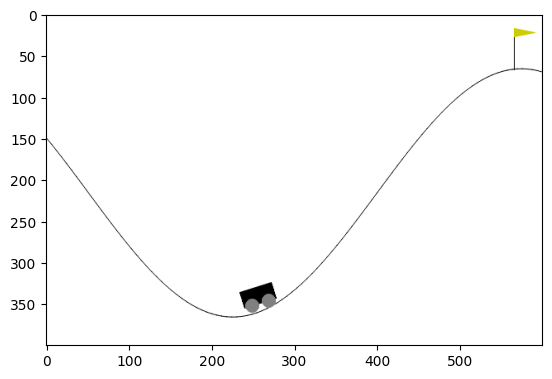

In [3]:
import gymnasium as gym

env = gym.make("MountainCar-v0", render_mode="rgb_array")
env.reset()

plt.imshow(env.render())
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)


Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gymnasium interface

The three main methods of an environment are
* `reset()`: reset environment to the initial state, return first observation and dict with auxiliary info
* `render()`: show current environment state (a more colorful version :) )
* `step(a)`: commit action `a` and return `(new_observation, reward, terminated, truncated, info)`
 * `new_observation`: an observation right after committing the action `a`
 * `reward`: a number representing your reward for committing action `a`
 * `terminated`: True if the MDP has just finished, False if still in progress
 * `truncated`: True if the number of steps elapsed >= max episode steps
 * `info`: some auxiliary stuff about what just happened. For now, ignore it.

A detailed explanation of the difference between `terminated` and `truncated` and how it should be used:
1. https://gymnasium.farama.org/tutorials/gymnasium_basics/handling_time_limits/
2. https://gymnasium.farama.org/content/migration-guide/

In [4]:
# Set seed to reproduce initial state in stochastic environment
obs0, info = env.reset(seed=0)
print("initial observation code:", obs0)

obs0, info = env.reset(seed=1)
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity


initial observation code: [-0.47260767  0.        ]
initial observation code: [-0.49763566  0.        ]


In [5]:
print("taking action 2 (right)")
new_obs, reward, terminated, truncated, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", terminated)
print("is game truncated due to time limit?:", truncated)

# Note: as you can see, the car has moved to the right slightly (around 0.0005)


taking action 2 (right)
new observation code: [-0.4968302   0.00080547]
reward: -1.0
is game over?: False
is game truncated due to time limit?: False


### Play with it

Below is the code that drives the car to the right. However, if you simply use the default policy, the car will not reach the flag at the far right due to gravity.

__Your task__ is to fix it. Find a strategy that reaches the flag.

You are not required to build any sophisticated algorithms for now, and you definitely don't need to know any reinforcement learning for this. Feel free to hard-code :)

In [6]:
from IPython import display

# Create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.make("MountainCar-v0", render_mode="rgb_array"),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {"left": 0, "stop": 1, "right": 2}


In [10]:
def policy(obs, t):
    # Write the code for your policy here. You can use the observation
    # (a tuple of position and velocity), the current time step, or both,
    # if you want.
    position, velocity = obs

    # This is an example policy. You can try running it, but it will not work.
    # Your goal is to fix that. You don't need anything sophisticated here,
    # and you can hard-code any policy that seems to work.
    # Hint: think how you would make a swing go farther and faster.
    return actions["right"]


AssertionError: 20 (<class 'int'>) invalid

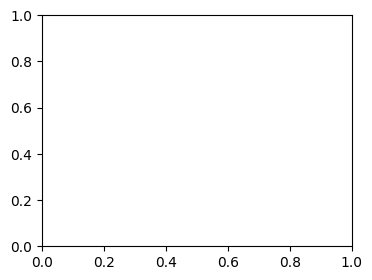

In [11]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs, _ = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()

    action = policy(obs, t)  # Call your policy
    obs, reward, terminated, truncated, _ = env.step(
        action
    )  # Pass the action chosen by the policy to the environment

    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    plt.imshow(env.render())

    display.display(plt.gcf())
    display.clear_output(wait=True)

    if terminated or truncated:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)


In [9]:
assert obs[0] > 0.47
print("You solved it!")


AssertionError: 